# Data Visualization in Python With Matplotlib: Advanced Concepts


# Setup

In [1]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import shap
import umap
import umap.plot
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

# Introduction

According to the [2020 Kaggle Machine Learning & Data Science survey](https://www.kaggle.com/c/kaggle-survey-2020), Matplotlib is the number one data visualization library among Kagglers, leading by a significant margin.

![](https://www.kaggleusercontent.com/kf/49771226/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..pH1R3fbJtdAYOX903yXtZQ.j_PASYffqDiaUm_rgXHjJ0VnLdbJvTlzcS9fP5aPpXQuANe8F7iHjrk0vD-B026nWpn6R9kHZJMO-ysdQqUap4gBdYrFq3wOv6kvl7SSZKwzfRoNGejK5p7zK3hT21XRfT7ZrXfS-5FTxkLhuwJb8eAVki_VBu5R9P3T_YwcLSBnqJxAuMt7ccayvsy-i3KaY4j-5v2SqVdijs6Tqe5tBMh6jUf4ApTpawfPeijmMZ4ggpgB994-spR6NIYLciKxgB0y0GdFWVckL0feR0831HwU3ZD3cc-BLgbq6-x8Jmu8gwFB1u5BwbEdmfVq9kloSsowF8x0qpXGTL4k1bX_2cOBhpLiiD4DH5rBJ7IPXWK3BIm4Zqbuv40YN1mtBRQVZL7klA9pbjOJ_TPuLNhz3ysAiRygcxyBr9zXTnEWAKmCkXpmvUdcqTQQdo3VakCLHbJNDFc61VoEyZ1A9Z5_W3snV8MDtOSa92pk0Mc8bb9jT4hpG8V5iTVHvrmHPiHwl5iO5mKragUxQ8jP8qFekhXum-6WM-s3xIfMgyBGsfM97Hhjo-vtB-6lD5w56KqjJ4g45gMrItVVfWFybIElVcctnRnDO3GUo_igAmhXp5ojuA-jjhMQCw2inmhvCkZcJmKNP4yWqfvOXzdQASFo5gQcWxuJhLcd4eng8yDBTSk.q9zZgM9KxJgyeO6DzBhu2g/__results___files/__results___46_0.png)

Recently, many courses and tutorials have been drawing beginner scientists' attention to new, shiny, interactive libraries like Plotly but it does not change the truth. Matplotlib is the king of data visualization libraries and it will continue to be so for the foreseeable future. 

Therefore, it is highly recommended that you learn it, especially beyond the basics, because the power of Matplolib becomes more evident when you tap into its more advanced features. In this tutorial, we will cover some of these features and give a solid introduction to the Object-oriented interface of Matplotlib.

# Matplotlib OOP basics

When you first learn Matplotlib, you probably start using the library with through its PyPlot interface. It is specifically designed for beginners because it is more user-friendly, requires less code to create visuals. However, its features fall short when you want to perform advanced customizations on your graphs. That's where the Object-oriented API comes into the play.

Under the hood, Matplotlib consists of base classes called artists.

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

Each circle-annotated component in the above graph is a separate class that inherits from the base artists. Having unique classes for each component of a visual gives Matplotlib users a ton of flexibility. Basically, this means that you can tweak every little line, dot, text or object visible on the plot. 

In the next sections, we will learn about the most important of these classes, starting with figure and axes objects.

# Figure and axes objects

Let's first import Matplotlib and its submodules:

In [3]:
import matplotlib as mpl  # pip install matplotlib
import matplotlib.pyplot as plt

Next, we create a figure and an axes object using the `subplots` function:

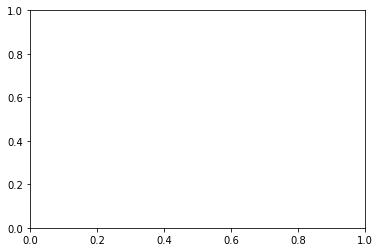

In [4]:
fig, ax = plt.subplots()

Now, let's explain what these objects do. 

`fig` (figure) is the highest-level artist, an object that contains everything. Think of it as the canvas you can draw on. An axes object (`ax`) represents a single set of XY coordinates systems. All Matplotlib plots require a coordinate system, so you need to create at least one figure and one axes object to draw charts. 

`plt.subplots` is a shorthand for doing this - it creates a single figure and one or more axes objects in a single line of code. A more verbose version of this would be like this:

In [6]:
fig = plt.figure()
ax1 = fig.add_axes()

<Figure size 432x288 with 0 Axes>

Since this version requires more code, people usually stick to `subplots`. Besides, you can pass extra arguments to create multiple axes objects in a single figure simultaneously:

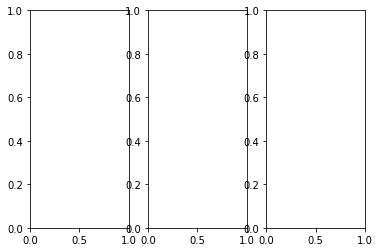

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3)

By changing the `nrows` and `ncols` arguments, you create a set of subplots - multiple axes objects which are stored in `axes`. You can access each one by using a loop or indexing operators. You can learn how to use the `subplots` function in-depth from its [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

# Plotting functions

When you switch from PyPlot to OOP API, the function names for plots does not change. You just have to call them using the axes object:

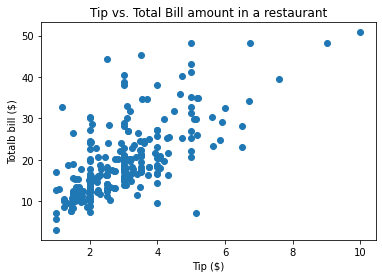

In [14]:
import seaborn as sns

tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

ax.scatter(tips["tip"], tips["total_bill"])
ax.set(
    title="Tip vs. Total Bill amount in a restaurant",
    xlabel="Tip ($)",
    ylabel="Totalb bill ($)",
);

Here, I am introducing the `set` function, which can be used on any Matplotlib object to tweak its properties.

The above plot is a bit bland and in no way compares to default scatterplots created by Seaborn:

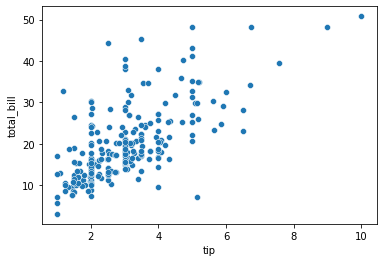

In [15]:
sns.scatterplot(tips["tip"], tips["total_bill"]);

For this reason, I will introduce two extremely flexible functions you can use to customize your plots in the next section.

# `plt.setp` and `plt.getp` functions

# Line2D object

In [2]:
from matplotlib.lines import Line2D

# Customizing axis ticks

# Working with legends

# Summary